In [173]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

In [175]:
df = pd.read_csv('Downloads/text.csv')
df = df.sample(n=100000, random_state=42)
df.head()

,Unnamed: 0,text,label
36130,36130,id say maybe made them feel foolish but that w...,0
138065,138065,i joined the lds church i admit to feeling som...,0
146440,146440,i must admit i didnt feel like hugging him not...,3
103337,103337,i hate that i can still feel if any nerve is d...,0
315528,315528,im actually feeling a little smug,1


In [176]:
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (100000, 3)


In [177]:
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [178]:
df.duplicated().sum()

0

In [179]:
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [180]:
df.head()

,Text,Label
36130,id say maybe made them feel foolish but that w...,0
138065,i joined the lds church i admit to feeling som...,0
146440,i must admit i didnt feel like hugging him not...,3
103337,i hate that i can still feel if any nerve is d...,0
315528,im actually feeling a little smug,1


In [181]:
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

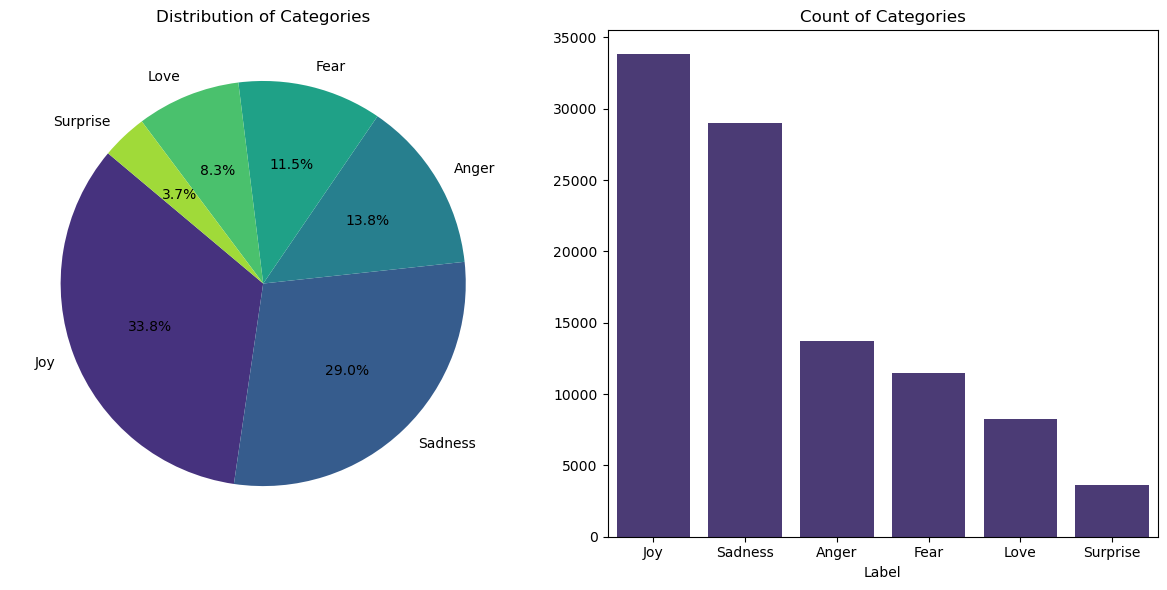

In [182]:
count = df['Label'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')
sns.barplot(x=count.index, y=count.values, ax=axs[1], color=palette[0], legend=False)
axs[1].set_title('Count of Categories')
plt.tight_layout()
plt.show()

In [183]:
df_sadness = df[df['Label']=='Sadness']
df_joy = df[df['Label']=='Joy']
df_love = df[df['Label']=='Love']
df_anger = df[df['Label']=='Anger']
df_fear = df[df['Label']=='Fear']
df_surprise = df[df['Label']=='Surprise']

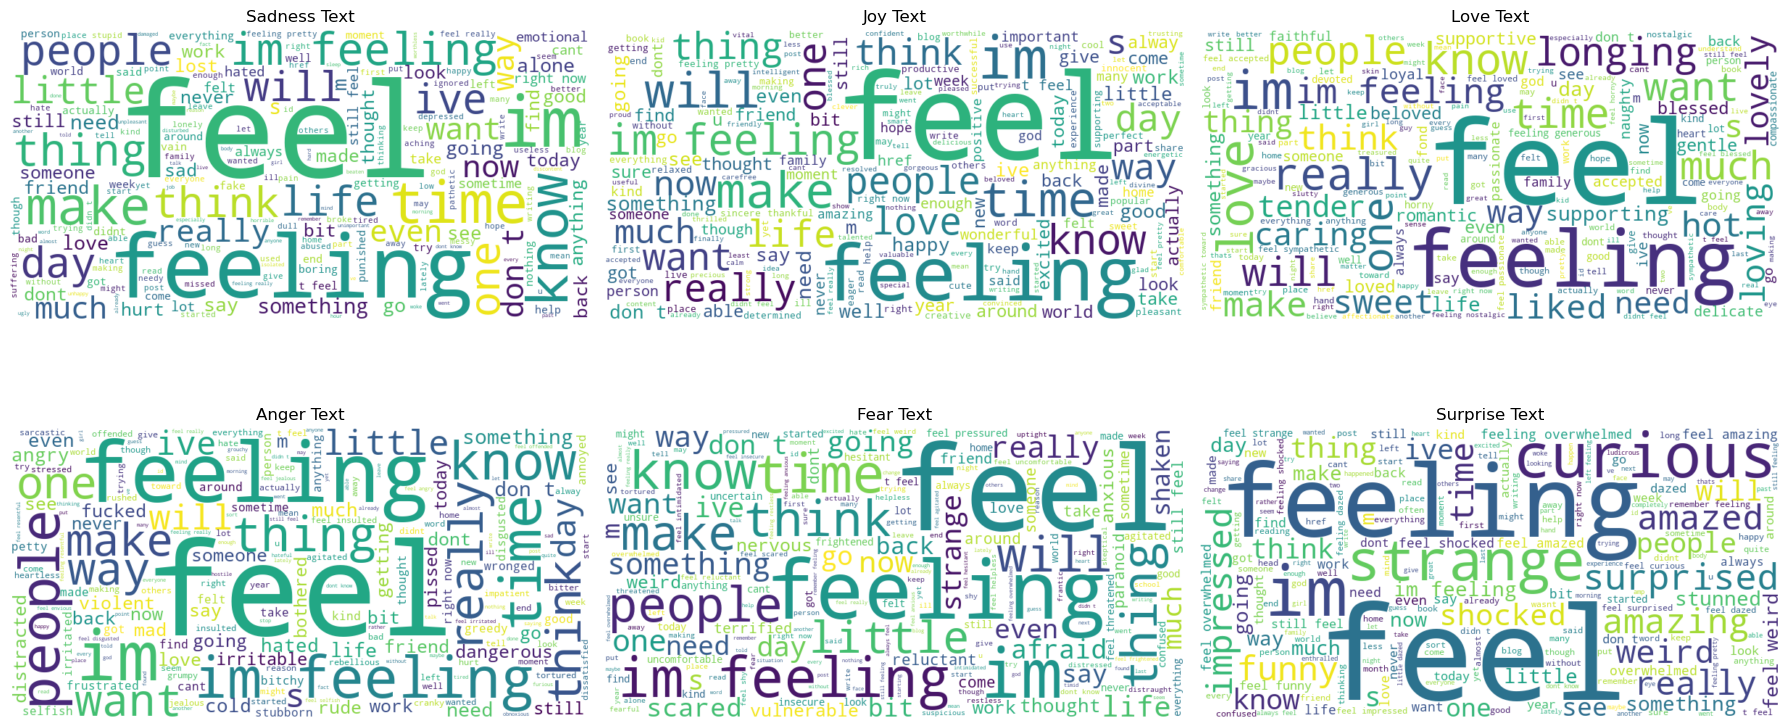

In [184]:
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

In [185]:
label_mapping = {
    'Sadness': 0,
    'Joy': 1,
    'Love': 2,
    'Anger': 3,
    'Fear': 4,
    'Surprise': 5
}

df['Label'] = df['Label'].map(label_mapping).astype(int)

In [186]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#nltk.download('punkt')
#nltk.download('stopwords')

In [187]:
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)
print(df.head())

                                                     Text  Label
36130   id say maybe made them feel foolish but that w...      0
138065  i joined the lds church i admit to feeling som...      0
146440  i must admit i didnt feel like hugging him not...      3
103337  i hate that i can still feel if any nerve is d...      0
315528                  im actually feeling a little smug      1


In [188]:
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

print(df.head())

                                                     Text  Label
36130   id say maybe made them feel foolish but that w...      0
138065  i joined the lds church i admit to feeling som...      0
146440  i must admit i didnt feel like hugging him not...      3
103337  i hate that i can still feel if any nerve is d...      0
315528                  im actually feeling a little smug      1


In [189]:
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)

print(df.head())

                                                     Text  Label
36130   id say maybe made them feel foolish but that w...      0
138065  i joined the lds church i admit to feeling som...      0
146440  i must admit i didnt feel like hugging him not...      3
103337  i hate that i can still feel if any nerve is d...      0
315528                  im actually feeling a little smug      1


In [190]:
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)

df.head()

,Text,Label
36130,id say maybe made them feel foolish but that w...,0
138065,i joined the lds church i admit to feeling som...,0
146440,i must admit i didnt feel like hugging him not...,3
103337,i hate that i can still feel if any nerve is d...,0
315528,im actually feeling a little smug,1


In [191]:
df['Text'] = df['Text'].str.lower()

print(df.head())

                                                     Text  Label
36130   id say maybe made them feel foolish but that w...      0
138065  i joined the lds church i admit to feeling som...      0
146440  i must admit i didnt feel like hugging him not...      3
103337  i hate that i can still feel if any nerve is d...      0
315528                  im actually feeling a little smug      1


In [192]:
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Text,Label
36130,id say maybe made feel foolish would reeeeeeal...,0
138065,joined lds church admit feeling somewhat asham...,0
146440,must admit didnt feel like hugging angry disgu...,3
103337,hate still feel nerve damaged badly enough oft...,0
315528,im actually feeling little smug,1


In [193]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df.head()

,Text,Label
36130,id say maybe made feel foolish would reeeeeeal...,0
138065,joined lds church admit feeling somewhat asham...,0
146440,must admit didnt feel like hugging angry disgu...,3
103337,hate still feel nerve damaged badly enough oft...,0
315528,im actually feeling little smug,1


In [194]:
X = df['Text']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000,)
X_test shape: (20000,)
y_train shape: (80000,)
y_test shape: (20000,)


In [195]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [196]:
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 46


In [197]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[  35    2   12 ...    0    0    0]
 [   1  547  787 ...    0    0    0]
 [   1    3   10 ...    0    0    0]
 ...
 [2773  130  402 ...    0    0    0]
 [  69    3  115 ...    0    0    0]
 [   1  254 3816 ...    0    0    0]]

X_test_padded:
[[   1  484   35 ...    0    0    0]
 [   1  495   53 ...    0    0    0]
 [1457 3423  394 ...    0    0    0]
 ...
 [   1  158  195 ...    0    0    0]
 [   4    2  450 ...    0    0    0]
 [   1    3 1208 ...    0    0    0]]


In [198]:
input_Size = np.max(X_train_padded) + 1
input_Size

34637

In [199]:
print("Max index in training data:", np.max(X_train_padded))
print("Max index in testing data:", np.max(X_test_padded))


Max index in training data: 34636
Max index in testing data: 38229


In [200]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Bidirectional, GRU, BatchNormalization, Dense

input_Size = 50000  
maxlen = 46      

model = Sequential()

model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

model.add(Dropout(0.5))

model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

model.add(BatchNormalization())

model.add(Bidirectional(GRU(64)))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [204]:
history = model.fit(
    X_train_padded, 
    y_train, 
    epochs=10, 
    batch_size=8000, 
    validation_data=(X_test_padded, y_test)
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 6s/step - accuracy: 0.3077 - loss: 1.6952 - val_accuracy: 0.3040 - val_loss: 1.7713
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.4702 - loss: 1.4309 - val_accuracy: 0.5576 - val_loss: 1.7375
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.6291 - loss: 1.0375 - val_accuracy: 0.7040 - val_loss: 1.6552
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 7s/step - accuracy: 0.6679 - loss: 0.9891 - val_accuracy: 0.8030 - val_loss: 1.5867
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.8308 - loss: 0.5323 - val_accuracy: 0.8280 - val_loss: 1.4964
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - accuracy: 0.8903 - loss: 0.3385 - val_accuracy: 0.8508 - val_loss: 1.3845
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.9126 - loss: 0.2559 - val_accuracy: 0.8591 - val_loss: 1.2909
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.9212 - loss: 0.2146 - val_accuracy: 0.8691 - val_loss:

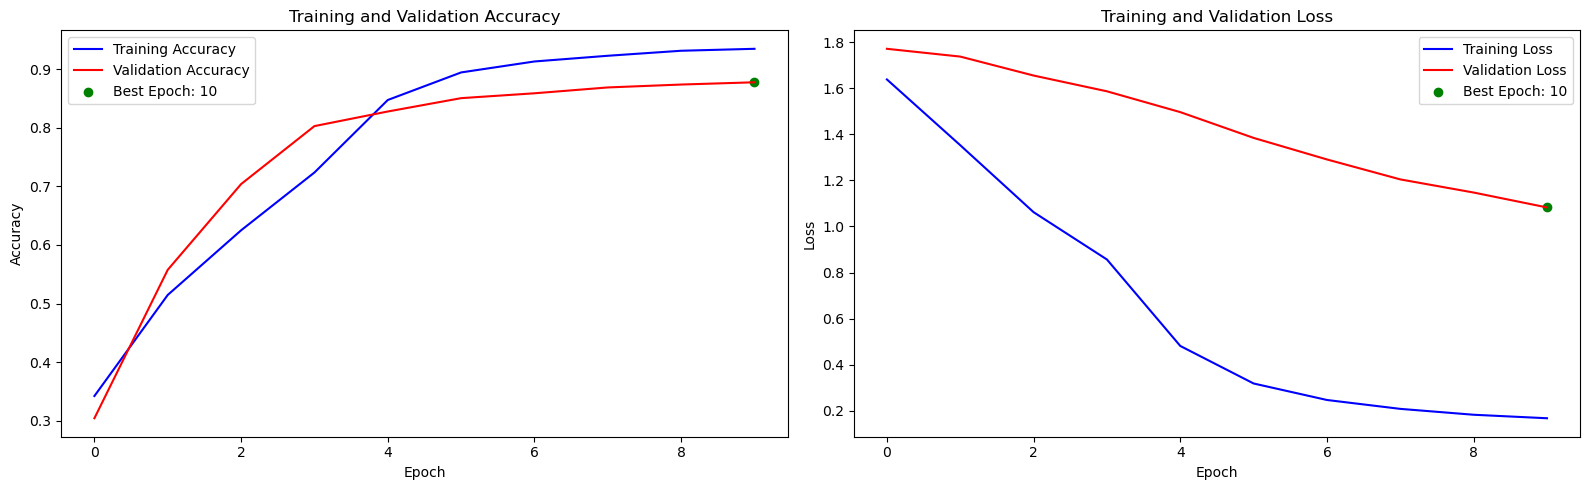

In [205]:
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [206]:
model.evaluate(X_test_padded, y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8808 - loss: 1.0804


[1.0825937986373901, 0.8779000043869019]

In [207]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step


<Axes: >

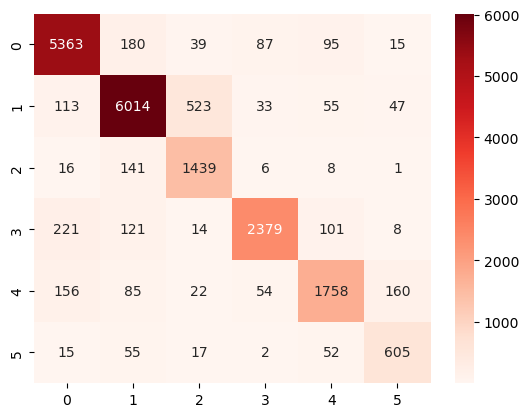

In [210]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')